In [1]:
# importing the necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3 
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display, HTML
%matplotlib inline

import os


# connecting the database
conn = sqlite3.connect('database.sqlite')
c = conn.cursor()

In [2]:
# printing all the tables present in database.sqlite 
for row in c.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(list(row))

['sqlite_sequence']
['Player_Attributes']
['Player']
['Match']
['League']
['Country']
['Team']
['Team_Attributes']


In [3]:
# selecting first five rows from player table
player = pd.read_sql_query(
    '''
        SELECT * FROM Player
        LIMIT 5
    ''', conn, index_col='id'
)
player

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
id,,,,,,
1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [4]:
# selecting first five rows from match table
match = pd.read_sql_query(
    '''
        SELECT * FROM Match
        LIMIT 5
    ''', conn, index_col='id'
)
match

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
id,,,,,,,,,,,,,,,,,,,,,
1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [5]:
# selecting first five rows from league table
league = pd.read_sql_query(
    '''
        SELECT * FROM League
        LIMIT 5
    ''', conn, index_col='id'
)
league

,country_id,name
id,,
1,1,Belgium Jupiler League
1729,1729,England Premier League
4769,4769,France Ligue 1
7809,7809,Germany 1. Bundesliga
10257,10257,Italy Serie A


In [6]:
# selecting first five rows from country table
country = pd.read_sql_query(
    '''
        SELECT * FROM Country
        LIMIT 5
    ''', conn, index_col='id'
)
country

,name
id,
1,Belgium
1729,England
4769,France
7809,Germany
10257,Italy


In [7]:
# selecting first five rows from team table
team = pd.read_sql_query(
    '''
        SELECT * FROM Team
        LIMIT 5
    ''', conn, index_col='id'
)
team

,team_api_id,team_fifa_api_id,team_long_name,team_short_name
id,,,,
1,9987,673,KRC Genk,GEN
2,9993,675,Beerschot AC,BAC
3,10000,15005,SV Zulte-Waregem,ZUL
4,9994,2007,Sporting Lokeren,LOK
5,9984,1750,KSV Cercle Brugge,CEB


In [8]:
# Number teams each country have
query = pd.read_sql_query(
    '''
        SELECT 
              c.name AS Country,
              COUNT(DISTINCT(team_long_name)) AS 'No. of Teams'
              FROM Match AS m
              LEFT JOIN Country AS c
              ON m.country_id = c.id
              LEFT JOIN Team AS t 
              ON m.home_team_api_id = t.team_api_id
              GROUP BY Country
    ''', conn
)
query

,Country,No. of Teams
0,Belgium,24
1,England,34
2,France,35
3,Germany,30
4,Italy,32
5,Netherlands,25
6,Poland,22
7,Portugal,29
8,Scotland,17
9,Spain,33


In [9]:
# total goals scored by home team grouped by country and Season
query1 = pd.read_sql_query(
    '''
        SELECT c.name AS Country,
               m.season AS Season,
               SUM(m.home_team_goal) AS 'Home Goal',
               SUM(m.away_team_goal) AS 'Away Goal'
        FROM Match as m 
        LEFT JOIN country AS c
        ON m.country_id = c.id
        GROUP BY Country, Season    
        ORDER BY Country     
    ''', conn
)
query1

,Country,Season,Home Goal,Away Goal
0,Belgium,2008/2009,499,356
1,Belgium,2009/2010,308,257
2,Belgium,2010/2011,382,253
3,Belgium,2011/2012,421,270
4,Belgium,2012/2013,375,328
...,...,...,...,...
83,Switzerland,2011/2012,235,190
84,Switzerland,2012/2013,272,190
85,Switzerland,2013/2014,290,230
86,Switzerland,2014/2015,289,228


In [10]:
# goals scored by each team grouped by season
query2 = pd.read_sql_query(
    '''
        SELECT t.team_long_name AS Team, 
               m.season as Season,
               SUM(m.home_team_goal) AS 'Home Goal',
               SUM(m.away_team_goal) AS 'Away Goal'
        FROM Match AS m
        LEFT JOIN Team AS t
        ON m.home_team_api_id = t.team_api_id 
        GROUP BY Team, Season
        ORDER BY Team
    ''', conn
)
query2

,Team,Season,Home Goal,Away Goal
0,1. FC Kaiserslautern,2010/2011,25,19
1,1. FC Kaiserslautern,2011/2012,12,28
2,1. FC Köln,2008/2009,14,25
3,1. FC Köln,2009/2010,18,29
4,1. FC Köln,2010/2011,30,21
...,...,...,...,...
1473,Śląsk Wrocław,2011/2012,26,14
1474,Śląsk Wrocław,2012/2013,23,15
1475,Śląsk Wrocław,2013/2014,21,16
1476,Śląsk Wrocław,2014/2015,21,9


In [11]:
query3 = pd.read_sql_query(
    '''
        SELECT c.name AS Country,
               t.team_long_name AS Team,
               m.season AS Season,
               SUM(m.home_team_goal) AS 'Home Goal',
               SUM(m.away_team_goal) AS 'Away Goal'
        FROM Match as m
        LEFT JOIN Country AS c
        ON m.country_id = c.id
        LEFT JOIN Team AS t
        ON m.home_team_api_id = t.team_api_id
        GROUP BY Country, Team, Season
        ORDER BY Country
    ''', conn
)
query3

,Country,Team,Season,Home Goal,Away Goal
0,Belgium,Beerschot AC,2008/2009,32,19
1,Belgium,Beerschot AC,2009/2010,20,22
2,Belgium,Beerschot AC,2010/2011,14,10
3,Belgium,Beerschot AC,2011/2012,26,13
4,Belgium,Beerschot AC,2012/2013,20,34
...,...,...,...,...,...
1473,Switzerland,Neuchâtel Xamax,2009/2010,35,27
1474,Switzerland,Neuchâtel Xamax,2010/2011,23,35
1475,Switzerland,Neuchâtel Xamax,2011/2012,12,10
1476,Switzerland,Servette FC,2011/2012,23,27


In [12]:
# count of matches won, lost and tie
query4 = pd.read_sql_query(
    '''
    WITH sub_q AS (
        SELECT     
                   c.name AS Country,
                   t.team_long_name AS Team,
                   COUNT(CASE WHEN m.home_team_goal > away_team_goal THEN 'Win' END) AS Won,
                   COUNT(CASE WHEN m.home_team_goal < away_team_goal THEN 'Lost' END) AS Lost,
                   COUNT(CASE WHEN m.home_team_goal = away_team_goal THEN 'Draw' END) AS Draw
         FROM Match AS m
         LEFT JOIN Country AS c
         ON m.country_id = c.id
         LEFT JOIN Team as t
         ON m.home_team_api_id = t.team_api_id
         GROUP BY Country, Team
         ORDER BY Country
         )
         SELECT ROW_NUMBER() OVER(ORDER BY Won DESC) AS 'Row Number',
                Country, 
                Team, 
                Won, 
                Lost,
                Draw
        FROM sub_q
    ''', conn, index_col='Row Number'
    )
query4

,Country,Team,Won,Lost,Draw
Row Number,,,,,
1,Spain,FC Barcelona,131,9,12
2,Spain,Real Madrid CF,129,12,11
3,Scotland,Celtic,120,9,23
4,England,Manchester United,116,20,16
5,England,Manchester City,113,21,18
...,...,...,...,...,...
292,Germany,DSC Arminia Bielefeld,2,7,8
293,Germany,SV Darmstadt 98,2,9,6
294,Scotland,Dunfermline Athletic,1,11,7


In [13]:
# total home goals scored grouped by country and team
query5 = pd.read_sql_query(
    '''
        SELECT name AS Name,
            team_long_name AS Team,
            --STRFTIME('%Y', date) AS Year, 
            SUM(home_team_goal) AS Goal
        FROM Match AS m
        LEFT JOIN Country as c
        ON m.country_id = c.id
        LEFT JOIN Team AS t
        ON m.home_team_api_id = t.team_api_id  
        GROUP BY Name, Team
        ORDER BY Goal DESC
        
    ''', conn
)
query5

,Name,Team,Goal
0,Spain,Real Madrid CF,505
1,Spain,FC Barcelona,495
2,Scotland,Celtic,389
3,Germany,FC Bayern Munich,382
4,Netherlands,PSV,370
...,...,...,...
291,France,AC Arles-Avignon,14
292,Portugal,Trofense,14
293,Portugal,Feirense,13
294,Spain,Córdoba CF,12


In [14]:
# total goals scored grouped by country and year
query6 = pd.read_sql_query(
    '''
        WITH year_wise AS (
            SELECT country_id, STRFTIME('%Y', date) AS Year, home_team_goal AS Goal
            FROM Match
        )
        SELECT name AS Name, Year , SUM(Goal) AS Goals
        FROM year_wise as y
        LEFT JOIN Country as c
        ON y.country_id = c.id
        GROUP BY Name, Year
        
    ''', conn
)
query6

,Name,Year,Goals
0,Belgium,2008,262
1,Belgium,2009,452
2,Belgium,2010,371
3,Belgium,2011,362
4,Belgium,2012,454
...,...,...,...
94,Switzerland,2012,222
95,Switzerland,2013,286
96,Switzerland,2014,289
97,Switzerland,2015,313


In [15]:
# extracting Year, Month, Week and day from date
query7 = pd.read_sql_query(
    '''
        SELECT date AS Date,
               STRFTIME('%Y', date) AS Year,
               STRFTIME('%m', date) AS Month,
               STRFTIME('%w', date) AS Week,
               STRFTIME('%d', date) AS Day
        FROM Match
    ''', conn
)
query7

,Date,Year,Month,Week,Day
0,2008-08-17 00:00:00,2008,08,0,17
1,2008-08-16 00:00:00,2008,08,6,16
2,2008-08-16 00:00:00,2008,08,6,16
3,2008-08-17 00:00:00,2008,08,0,17
4,2008-08-16 00:00:00,2008,08,6,16
...,...,...,...,...,...
25974,2015-09-22 00:00:00,2015,09,2,22
25975,2015-09-23 00:00:00,2015,09,3,23
25976,2015-09-23 00:00:00,2015,09,3,23
25977,2015-09-22 00:00:00,2015,09,2,22


In [16]:
# count of matches won, lost and tie
query8 = pd.read_sql_query(
    '''
    WITH sub_q AS (
        SELECT     
                   c.name AS Country,
                   season AS Season,
                   t.team_long_name AS Team,
                   --m.home_team_goal AS home_goal,
                   --m.away_team_goal AS away_goal,
                   COUNT(CASE WHEN m.home_team_goal > away_team_goal THEN 'Win' END) AS Won,
                   COUNT(CASE WHEN m.home_team_goal < away_team_goal THEN 'Lost' END) AS Lost,
                   COUNT(CASE WHEN m.home_team_goal = away_team_goal THEN 'Draw' END) AS Draw
         FROM Match AS m
         LEFT JOIN Country AS c
         ON m.country_id = c.id
         LEFT JOIN Team as t
         ON m.home_team_api_id = t.team_api_id
         GROUP BY Country, Season
         ORDER BY Country
         )
         SELECT ROW_NUMBER() OVER(ORDER BY Won DESC) AS 'Row Number',
                Country, 
                Season,
                Won, 
                Lost,
                Draw
        FROM sub_q
    ''', conn, index_col='Row Number'
    )
query8

,Country,Season,Won,Lost,Draw
Row Number,,,,,
1,Spain,2010/2011,197,104,79
2,Spain,2009/2010,194,91,95
3,England,2009/2010,193,91,96
4,Italy,2008/2009,192,93,95
5,Spain,2012/2013,189,107,84
...,...,...,...,...,...
84,Switzerland,2015/2016,80,53,47
85,Switzerland,2014/2015,76,56,48
86,Switzerland,2010/2011,72,57,51


In [17]:
# partitioning by Season and Country
query9 = pd.read_sql_query(
    '''
    WITH sub_q AS (
        SELECT 
              season AS Season,
              name AS Country,
              team_long_name AS Team,
              SUM(home_team_goal) AS Goal
        FROM Match AS m
        LEFT JOIN Country as c
        ON m.country_id = c.id
        LEFT JOIN Team AS t
        ON m.home_team_api_id = t.team_api_id  
        GROUP BY Season, Name, Team
        ORDER BY Goal DESC
        )
        SELECT 
              ROW_NUMBER() OVER(PARTITION BY Season, Country) AS 'Row No.',
              Season,
              Country,
              Team, 
              Goal
        FROM sub_q
        
    ''', conn, index_col='Row No.'
)
query9

,Season,Country,Team,Goal
Row No.,,,,
1,2008/2009,Belgium,RSC Anderlecht,48
2,2008/2009,Belgium,Standard de Liège,42
3,2008/2009,Belgium,Club Brugge KV,37
4,2008/2009,Belgium,Beerschot AC,32
5,2008/2009,Belgium,KAA Gent,31
...,...,...,...,...
6,2015/2016,Switzerland,FC Zürich,29
7,2015/2016,Switzerland,FC Thun,26
8,2015/2016,Switzerland,FC St. Gallen,25


In [18]:
# concatenating team name with country name
query10 = pd.read_sql_query(
    '''
    WITH sub_q AS (
        SELECT  
              team_long_name || ' (' || name || ')' AS Team,
              SUM(home_team_goal) AS Goal
        FROM Match AS m
        LEFT JOIN Country as c
        ON m.country_id = c.id
        LEFT JOIN Team AS t
        ON m.home_team_api_id = t.team_api_id  
        GROUP BY Season, Name, Team
        ORDER BY Goal DESC
        )
        SELECT 
              Team, 
              Goal
        FROM sub_q
        
    ''', conn
)
query10

,Team,Goal
0,FC Barcelona (Spain),73
1,Real Madrid CF (Spain),70
2,Real Madrid CF (Spain),70
3,Chelsea (England),68
4,Real Madrid CF (Spain),67
...,...,...
1473,Lechia Gdańsk (Poland),9
1474,KAA Gent (Belgium),6
1475,Lierse SK (Belgium),5
1476,Waasland-Beveren (Belgium),4


In [19]:
# Read data into DataFrames from all the available tables

PlayerAttribute_df = pd.read_sql("Select * from Player_Attributes",conn)

Player_df = pd.read_sql("Select * from Player",conn)

Match_df = pd.read_sql("Select * from Match",conn)

League_df = pd.read_sql("Select * from League",conn)

Country_df = pd.read_sql("Select * from Country",conn)

Team_df = pd.read_sql("Select * from Team",conn)

TeamAttributes_df = pd.read_sql("Select * from Team_Attributes",conn)

In [20]:
#Function to find the proportion of missing values

def missing_values(input_df,null_percent=0):

    output_df = pd.DataFrame({'missing_count':[],'missing_prop':[]})
    nullcount_df = input_df.isna().sum()
    output_df['missing_count'] = nullcount_df.iloc[0:]
    output_df['missing_prop'] = output_df['missing_count']/len(input_df.index)*100
    output_df.index=nullcount_df.index
    if null_percent>0:
        return output_df[output_df['missing_prop']>=null_percent]
    else:
        return output_df

In [21]:
missing_values(Match_df,20)

,missing_count,missing_prop
goal,11762,45.275030
shoton,11762,45.275030
shotoff,11762,45.275030
foulcommit,11762,45.275030
card,11762,45.275030
cross,11762,45.275030
corner,11762,45.275030
possession,11762,45.275030
PSH,14811,57.011432
PSD,14811,57.011432


# Analysis

In [22]:
#Merge Match_df with Country_df
MatchMerged_df = Match_df.merge(Country_df,left_on='country_id',right_on='id',
                              how='left',suffixes=('_match','_country'))
MatchMerged_df.rename(columns={'name':'country'},inplace=True)

#Merge with League info
MatchMerged_df = MatchMerged_df.merge(League_df,left_on='league_id',right_on='id',
                                    how='left',suffixes=('_match','_league'))
MatchMerged_df.rename(columns={'id':'id_league','name':'league'},inplace=True)

#Merge with Team Info
MatchMerged_df = MatchMerged_df.merge(Team_df[['team_api_id','team_long_name']],
                                      left_on='home_team_api_id', right_on='team_api_id', # For home team
                                      how='left', suffixes=('_match','_team'))
MatchMerged_df.rename(columns = {'team_api_id':'team_api_id_home','team_long_name':'home_team'},inplace=True)
MatchMerged_df = MatchMerged_df.merge(Team_df[['team_api_id','team_long_name']],
                                      left_on='away_team_api_id',right_on='team_api_id', # For away team
                                      how='left',suffixes=('_match','_away'))
MatchMerged_df.rename(columns = {'team_api_id':'team_api_id_home','team_long_name':'away_team'},inplace=True)

#Reformat Date Column
MatchMerged_df['date'] = pd.to_datetime(MatchMerged_df['date'])

#Create New Column as 'total_no_goals'= 'home_team_goal'+'away_team_goal'
MatchMerged_df['total_no_goals']=MatchMerged_df['home_team_goal'] + MatchMerged_df['away_team_goal']

#DataFrame(in_use).loc['condition to be satisfied','new_column_name']='value, if condition is True'

#Create new column 'result' that identifies the result of the match (HTW: Home Team Win, ATW: Away team Win, D: Draw)
MatchMerged_df.loc[MatchMerged_df['home_team_goal'] > MatchMerged_df['away_team_goal'],'result'] = 'HTW'
MatchMerged_df.loc[MatchMerged_df['away_team_goal'] > MatchMerged_df['home_team_goal'],'result'] = 'ATW'
MatchMerged_df.loc[MatchMerged_df['home_team_goal'] == MatchMerged_df['away_team_goal'],'result'] = 'D'

#Create new column 'winning_team' that identifies the winning team
MatchMerged_df.loc[MatchMerged_df['home_team_goal'] > MatchMerged_df['away_team_goal'],
                   'winning_team'] = MatchMerged_df['home_team']
MatchMerged_df.loc[MatchMerged_df['away_team_goal'] > MatchMerged_df['home_team_goal'],
                   'winning_team'] = MatchMerged_df['away_team']
MatchMerged_df.loc[MatchMerged_df['home_team_goal'] == MatchMerged_df['away_team_goal'],
                   'winning_team'] = np.nan

#Create new column 'losing_team' that identifies the losing team
MatchMerged_df.loc[MatchMerged_df['home_team_goal'] > MatchMerged_df['away_team_goal'],
                   'losing_team'] = MatchMerged_df['away_team']
MatchMerged_df.loc[MatchMerged_df['away_team_goal'] > MatchMerged_df['home_team_goal'],
                   'losing_team'] = MatchMerged_df['home_team']
MatchMerged_df.loc[MatchMerged_df['home_team_goal'] == MatchMerged_df['away_team_goal'], 
                   'losing_team'] = np.nan

MatchMerged_df.head()

,id_match,country_id_match,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,country_id_league,league,team_api_id_home,home_team,team_api_id_home,away_team,total_no_goals,result,winning_team,losing_team
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,...,1,Belgium Jupiler League,9987,KRC Genk,9993,Beerschot AC,2,D,NaN,NaN
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,...,1,Belgium Jupiler League,10000,SV Zulte-Waregem,9994,Sporting Lokeren,0,D,NaN,NaN
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,...,1,Belgium Jupiler League,9984,KSV Cercle Brugge,8635,RSC Anderlecht,3,ATW,RSC Anderlecht,KSV Cercle Brugge
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,...,1,Belgium Jupiler League,9991,KAA Gent,9998,RAEC Mons,5,HTW,KAA Gent,RAEC Mons
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,...,1,Belgium Jupiler League,7947,FCV Dender EH,9985,Standard de Liège,4,ATW,Standard de Liège,FCV Dender EH


In [23]:
#Create new dataframe with only required columns

NewMatch_df=MatchMerged_df[['season','stage','date','country','league','home_team','away_team',
                            'home_team_goal','away_team_goal','total_no_goals',
                           'winning_team','losing_team','result']]
NewMatch_df.head()

,season,stage,date,country,league,home_team,away_team,home_team_goal,away_team_goal,total_no_goals,winning_team,losing_team,result
0,2008/2009,1,2008-08-17,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,1,1,2,NaN,NaN,D
1,2008/2009,1,2008-08-16,Belgium,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,0,0,0,NaN,NaN,D
2,2008/2009,1,2008-08-16,Belgium,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,0,3,3,RSC Anderlecht,KSV Cercle Brugge,ATW
3,2008/2009,1,2008-08-17,Belgium,Belgium Jupiler League,KAA Gent,RAEC Mons,5,0,5,KAA Gent,RAEC Mons,HTW
4,2008/2009,1,2008-08-16,Belgium,Belgium Jupiler League,FCV Dender EH,Standard de Liège,1,3,4,Standard de Liège,FCV Dender EH,ATW


## Most Happening Football Leagues - Based on League Statistics
### Average Goals Scored Per League¶

In [24]:
#Calculate Average Goals per League

LeagueAvgGoal_df=NewMatch_df.groupby(['league']).mean().sort_values(['total_no_goals'],ascending=False).reset_index()
LeagueAvgGoal_df.head()

,league,stage,home_team_goal,away_team_goal,total_no_goals
0,Netherlands Eredivisie,17.500000,1.779820,1.301062,3.080882
1,Switzerland Super League,18.386076,1.663150,1.266526,2.929677
2,Germany 1. Bundesliga,17.500000,1.626634,1.274918,2.901552
3,Belgium Jupiler League,15.770833,1.609375,1.192130,2.801505
4,Spain LIGA BBVA,19.500000,1.631250,1.135855,2.767105


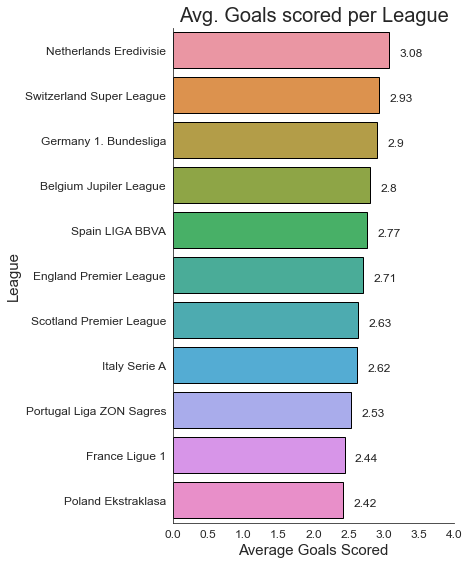

In [26]:
#Plot average goals scored per league

sns.set_style('white')
a=sns.catplot(kind='bar',x='total_no_goals',y='league',data=LeagueAvgGoal_df,ci='std',edgecolor='k')
a.fig.set_size_inches(12,8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Average Goals Scored',fontsize=15)
plt.ylabel('League',fontsize=15)
plt.xlim(0,4)
plt.title('Avg. Goals scored per League',fontsize=20)
for i in range(len(LeagueAvgGoal_df)):
    plt.text(LeagueAvgGoal_df['total_no_goals'].iloc[i]+0.15,i+0.15,round(LeagueAvgGoal_df['total_no_goals'].iloc[i],2),fontsize=12)    

### Predictability of an Outcome in a League Match

In [27]:
#Find the number of Home Team Wins, Away Team Wins & Draws, by pivoting on League & the match results and counting the number of matches played
#Also, sum the columns to find the total number of matches played in the League

LeagueProp=MatchMerged_df.pivot_table(index='league',columns='result',values='match_api_id',aggfunc='count')
LeagueProp['sum']=LeagueProp.sum(axis=1)

LeagueProp.head()

result,ATW,D,HTW,sum
league,,,,
Belgium Jupiler League,493,425,810,1728
England Premier League,867,783,1390,3040
France Ligue 1,822,859,1359,3040
Germany 1. Bundesliga,744,597,1107,2448
Italy Serie A,814,796,1407,3017


In [28]:
#Divide the match results columns with the sum column to find their proportions

LeagueProp=LeagueProp[['HTW','ATW','D']].divide(LeagueProp['sum'],axis=0).multiply(100)

LeagueProp.head()

result,HTW,ATW,D
league,,,
Belgium Jupiler League,46.875000,28.530093,24.594907
England Premier League,45.723684,28.519737,25.756579
France Ligue 1,44.703947,27.039474,28.256579
Germany 1. Bundesliga,45.220588,30.392157,24.387255
Italy Serie A,46.635731,26.980444,26.383825


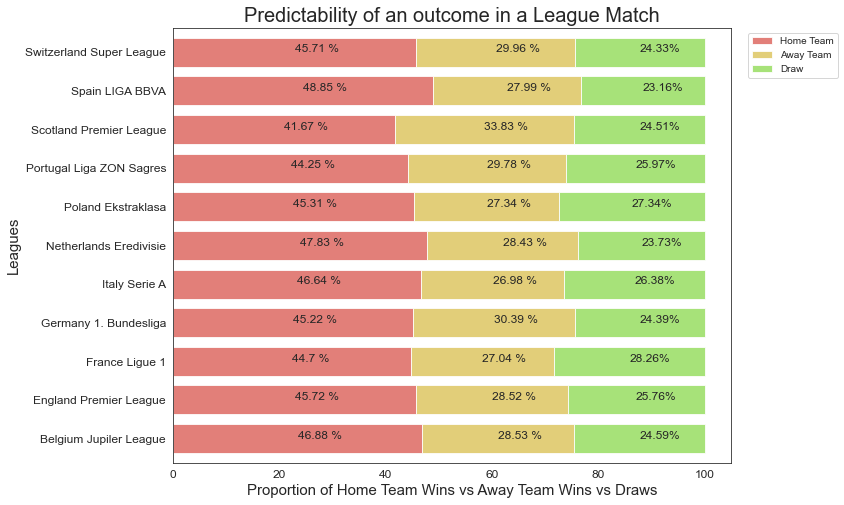

In [29]:
ax=LeagueProp.plot.barh(stacked=True,figsize=(10,8),width=0.75,color=sns.color_palette("hls", 8),edgecolor='w',alpha=0.8)

ax.legend(['Home Team','Away Team','Draw'],bbox_to_anchor=(1.2,1),loc='upper right')
plt.title('Predictability of an outcome in a League Match',fontsize=20)
plt.xlabel('Proportion of Home Team Wins vs Away Team Wins vs Draws',fontsize=15)
plt.ylabel('Leagues',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for  i,j in enumerate(LeagueProp.index):
    plt.text(LeagueProp.loc[j,'HTW']/2,i,str(round(LeagueProp.loc[j,'HTW'],2))+' %',fontsize=12)
    plt.text(LeagueProp.loc[j,'HTW']+LeagueProp.loc[j,'ATW']/2,i,str(round(LeagueProp.loc[j,'ATW'],2))+' %',fontsize=12)
    plt.text(LeagueProp.loc[j,'HTW']+LeagueProp.loc[j,'ATW']+LeagueProp.loc[j,'D']/2,i,str(round(LeagueProp.loc[j,'D'],2))+'%',fontsize=12)

**From the above plot, we observe that in every league the distribution of the Wins & Draws in every league is approximately same, though the probability of Home Team winning is high as seen in one of the above plots. **

## Season Wise League Score Table
** To make a Scoreboard,
*** First we need to find statistics of each match, for each of the teams involved.
*** Second, cumulate the acquired statistics for each team in each season.

In [31]:
#Split the match dataframe to get home team & away team statistics

home_team_df=MatchMerged_df[['season','league','home_team_api_id','home_team','away_team','home_team_goal',
                             'away_team_goal']]
away_team_df=MatchMerged_df[['season','league','away_team_api_id','away_team','home_team','away_team_goal',
                             'home_team_goal']]

home_team_df.rename(columns={'home_team_api_id':'team_api_id',
                 'home_team':'team',
                 'away_team':'opp_team',
                 'home_team_goal':'team_goal',
                 'away_team_goal':'opp_team_goal'},inplace=True)
away_team_df.rename(columns={'away_team_api_id':'team_api_id',
                 'away_team':'team',
                 'home_team':'opp_team',
                 'away_team_goal':'team_goal',
                 'home_team_goal':'opp_team_goal'},inplace=True)

TeamPoints_df=pd.concat([home_team_df,away_team_df],axis=0,ignore_index=True)
TeamPoints_df.head()

C:\Users\USR\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,season,league,team_api_id,team,opp_team,team_goal,opp_team_goal
0,2008/2009,Belgium Jupiler League,9987,KRC Genk,Beerschot AC,1,1
1,2008/2009,Belgium Jupiler League,10000,SV Zulte-Waregem,Sporting Lokeren,0,0
2,2008/2009,Belgium Jupiler League,9984,KSV Cercle Brugge,RSC Anderlecht,0,3
3,2008/2009,Belgium Jupiler League,9991,KAA Gent,RAEC Mons,5,0
4,2008/2009,Belgium Jupiler League,7947,FCV Dender EH,Standard de Liège,1,3


In [32]:
#Create 'Goal Difference' column
TeamPoints_df['goal_diff']=TeamPoints_df['team_goal']-TeamPoints_df['opp_team_goal']

#Create 'team_points' column for each team with following points system, (3: Winning Team, 1: Draw)
TeamPoints_df.loc[TeamPoints_df['team_goal']>TeamPoints_df['opp_team_goal'],'team_points']=3
TeamPoints_df.loc[TeamPoints_df['team_goal']==TeamPoints_df['opp_team_goal'],'team_points']=1

#Create 'Wins', 'Draws' & 'Losses' column 
TeamPoints_df.loc[TeamPoints_df['team_goal']>TeamPoints_df['opp_team_goal'],'wins']=1
TeamPoints_df.loc[TeamPoints_df['team_goal']<TeamPoints_df['opp_team_goal'],'losses']=1
TeamPoints_df.loc[TeamPoints_df['team_goal']==TeamPoints_df['opp_team_goal'],'draw']=1

#Capture matches played
TeamPoints_df['matches_played']=1

#Rearranging the tables to match actual score tables
TeamPoints_df.reindex(columns=['season', 'league', 'team','team_api_id', 'opp_team', 'matches_played',
'wins','draw','losses','team_goal','opp_team_goal','goal_diff','team_points'],copy=False)

#Generate Score table, by grouping the dataframe on 'league','season','team','team_api_id'. Also, let's sort it based on the following parameters in the below mentioned order
ScoreTable_df=TeamPoints_df.groupby(['league','season','team','team_api_id']).sum().sort_values(['league','season','team_points','goal_diff','team_goal'],ascending=[True,True,False,False,False]).reset_index()
ScoreTable_df.head()

,league,season,team,team_api_id,team_goal,opp_team_goal,goal_diff,team_points,wins,losses,draw,matches_played
0,Belgium Jupiler League,2008/2009,RSC Anderlecht,8635,75,30,45,77.0,24.0,5.0,5.0,34
1,Belgium Jupiler League,2008/2009,Standard de Liège,9985,66,26,40,77.0,24.0,5.0,5.0,34
2,Belgium Jupiler League,2008/2009,KAA Gent,9991,67,42,25,59.0,17.0,9.0,8.0,34
3,Belgium Jupiler League,2008/2009,Club Brugge KV,8342,59,50,9,59.0,18.0,11.0,5.0,34
4,Belgium Jupiler League,2008/2009,SV Zulte-Waregem,10000,55,36,19,55.0,16.0,11.0,7.0,34


In [33]:
#Dropdown for League information
League=widgets.Dropdown(
    options=[i for i in ScoreTable_df['league'].unique()],
    description='League:',
    disabled=False,
)

#Dropdown for Season information
Season=widgets.Dropdown(
    options=[i for i in ScoreTable_df['season'].unique()],
    description='Season:',
    disabled=False,
)

#Range Slider for Rank information
Rank_Range=widgets.IntRangeSlider(
    value=(1,ScoreTable_df[(ScoreTable_df['league']==League.value)&(ScoreTable_df['season']==Season.value)]['team'].nunique()),
    min=1,
    max=ScoreTable_df[(ScoreTable_df['league']==League.value)&(ScoreTable_df['season']==Season.value)]['team'].nunique(),
    step=1,
    description='Rank:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

def update_range(*args):
    Rank_Range.value=(1,ScoreTable_df[(ScoreTable_df['league']==League.value)&(ScoreTable_df['season']==Season.value)]['team'].nunique())
    Rank_Range.max=ScoreTable_df[(ScoreTable_df['league']==League.value)&(ScoreTable_df['season']==Season.value)]['team'].nunique()

#Observe changes in League & Season Dropdowns
League.observe(update_range,'value')
Season.observe(update_range,'value')

def team_results(league_val,season_val,range_val):
    MatchTable_df=ScoreTable_df[(ScoreTable_df['league']==league_val)&(ScoreTable_df['season']==season_val)].copy()
    MatchTable_df.rename(columns={'team':'Club','matches_played':'MP','wins':'W','draw':'D','losses':'L',
                                  'team_goal':'GF','opp_team_goal':'GA','goal_diff':'GD','team_points':'Pts'},inplace=True)
    MatchTable_df=MatchTable_df[['Club','MP','W','D','L','GF','GA','GD','Pts']].iloc[range_val[0]-1:range_val[1]]
    MatchTable_df.set_index(np.arange(1,len(MatchTable_df.index)+1),inplace=True)
    #We convert the DF to HTML using to_html and styple it using the classes of bootstrap
    display(HTML(MatchTable_df.to_html(classes='table table-striped table-hover table')))

Team_result=interact(team_results,league_val=League,season_val=Season,range_val=Rank_Range)

interactive(children=(Dropdown(description='League:', options=('Belgium Jupiler League', 'England Premier Leag…

### Most Winning & Losing Teams in History

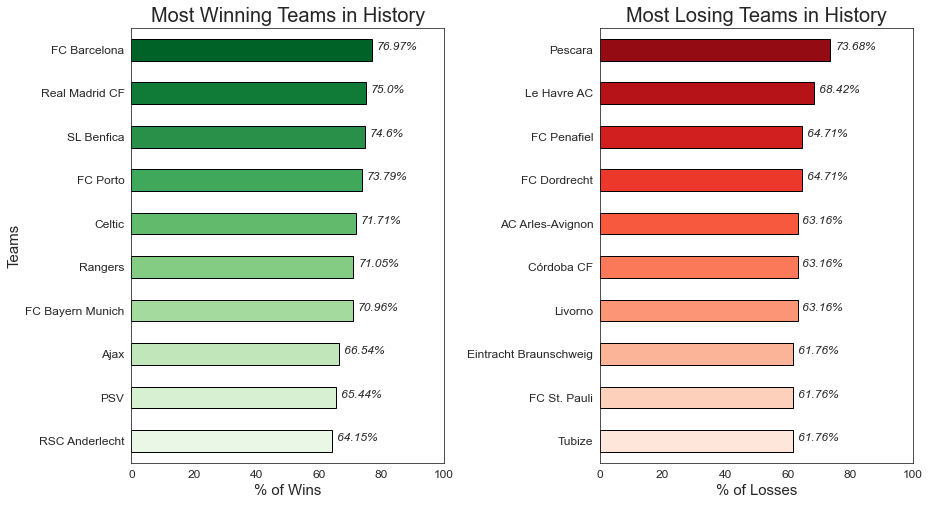

In [35]:
#Group the Match statistics on the basis of the Teams, and create new columns to calculate winning & losing proportion

Consolidated_df=ScoreTable_df.groupby(['team']).sum()
Consolidated_df['win_prop']=round(Consolidated_df['wins']/Consolidated_df['matches_played']*100,2)
Consolidated_df['loss_prop']=round(Consolidated_df['losses']/Consolidated_df['matches_played']*100,2)

#Sort based on columns win_prop & loss_prop to find the Most Winning & Losing teams respectively
MostWinningTeam_df=Consolidated_df.sort_values('win_prop',ascending=True).tail(10)['win_prop']
MostLosingTeam_df=Consolidated_df.sort_values('loss_prop',ascending=True).tail(10)['loss_prop']

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
MostWinningTeam_df.plot.barh(color=sns.color_palette('Greens', 10),edgecolor='k')
plt.title('Most Winning Teams in History',fontsize=20)
plt.xlim(0,100)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('% of Wins',fontsize=15)
plt.ylabel('Teams',fontsize=15)
for i,j in enumerate(MostWinningTeam_df.index):
    plt.text(MostWinningTeam_df.loc[j]+1.5,i,str(MostWinningTeam_df.loc[j])+'%',style='italic',fontsize=12)    

plt.subplot(1,2,2)
MostLosingTeam_df.plot.barh(color=sns.color_palette('Reds', 10),edgecolor='k')
plt.title('Most Losing Teams in History',fontsize=20)
plt.xlim(0,100)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('% of Losses',fontsize=15)
plt.ylabel('')
for i,j in enumerate(MostLosingTeam_df.index):
    plt.text(MostLosingTeam_df.loc[j]+1.5,i,str(MostLosingTeam_df.loc[j])+'%',style='italic',fontsize=12)

plt.subplots_adjust(wspace=0.5)

*** FC Barcelona(76.97%), Real Madrid CF(75%), SL Benefica(74.6%) have won most of the matches that they have played.

Whereas Pescara(73.68%), Le Havare AC(68.42%), FC Penafiel(64.71%) have lost most of the matches that they have played

##  Comparison of Team Attributes of Effective Teams to Rest of the Teams


In [36]:
Team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [37]:
TeamAttributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

*** NOTE: 'buildUpPlayDribbling' has values missing though 'buildUpPlayDribblingClass' has no missing values.
Need to look at the actual values.

In [38]:
#Look at the actual data for 'buildUpPlayDribbling','buildUpPlayDribblingClass'

bupd_df=TeamAttributes_df[['buildUpPlayDribbling','buildUpPlayDribblingClass']]
bupd_df.head(10)

,buildUpPlayDribbling,buildUpPlayDribblingClass
0,NaN,Little
1,48.0,Normal
2,41.0,Normal
3,NaN,Little
4,NaN,Little
5,NaN,Little
6,NaN,Little
7,64.0,Normal
8,64.0,Normal
9,NaN,Little


In [39]:
bupd_df[bupd_df['buildUpPlayDribbling'].isna()]['buildUpPlayDribblingClass'].unique()

array(['Little'], dtype=object)

**Above found for most of 'buildUpPlayDribblingClass' = 'Little', 'buildUpPlayDribbling' has all NULL values**

In [41]:
bupd_df[bupd_df['buildUpPlayDribblingClass']=='Little'].describe()  

,buildUpPlayDribbling
count,35.000000
mean,30.485714
std,2.489642
min,24.000000
25%,29.000000
50%,32.000000
75%,32.000000
max,33.000000


**Mean of all available values under 'buildUpPlayDribblingClass' = 'Little' is 30**

In [43]:
#Replace Null values in TeamAttributes_df.buildUpPlayDribbling with 30

TeamAttributes_df['buildUpPlayDribbling'][TeamAttributes_df['buildUpPlayDribbling'].isna()]=30
TeamAttributes_df[['buildUpPlayDribbling','buildUpPlayDribblingClass']]

C:\Users\USR\AppData\Local\Temp/ipykernel_5032/437018208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TeamAttributes_df['buildUpPlayDribbling'][TeamAttributes_df['buildUpPlayDribbling'].isna()]=30


,buildUpPlayDribbling,buildUpPlayDribblingClass
0,30.0,Little
1,48.0,Normal
2,41.0,Normal
3,30.0,Little
4,30.0,Little
...,...,...
1453,30.0,Little
1454,30.0,Little
1455,30.0,Little
1456,42.0,Normal


In [45]:
#Group Match statistics on the basis of team and create new column 'avg_team_pts' that represent the average point gained by team

EffTeam_df=ScoreTable_df.groupby(['team_api_id','team']).sum().reset_index()
EffTeam_df['avg_team_pts']=round(EffTeam_df['team_points']/(EffTeam_df['matches_played']),2)
EffTeam_df.head()

,team_api_id,team,team_goal,opp_team_goal,goal_diff,team_points,wins,losses,draw,matches_played,avg_team_pts
0,1601,Ruch Chorzów,280,292,-12,333.0,92.0,91.0,57.0,240,1.39
1,1773,Oud-Heverlee Leuven,126,162,-36,94.0,22.0,40.0,28.0,90,1.04
2,1957,Jagiellonia Białystok,287,315,-28,325.0,87.0,89.0,64.0,240,1.35
3,2033,S.C. Olhanense,138,209,-71,151.0,32.0,63.0,55.0,150,1.01
4,2182,Lech Poznań,372,210,162,432.0,124.0,56.0,60.0,240,1.80


In [46]:
#Let's understand the distribution of the average team points

EffTeam_df.describe(percentiles=[0.1,0.25,0.50,0.75,0.90])

,team_api_id,team_goal,opp_team_goal,goal_diff,team_points,wins,losses,draw,matches_played,avg_team_pts
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,12340.521739,235.073579,235.073579,0.000000,238.598662,64.826087,64.826087,44.120401,173.772575,1.231839
std,25940.411135,171.803817,121.746937,115.906292,175.051669,51.802767,33.114858,25.148796,96.448104,0.368801
min,1601.000000,21.000000,38.000000,-183.000000,20.000000,3.000000,12.000000,4.000000,30.000000,0.530000
10%,7864.000000,35.000000,62.800000,-90.600000,31.800000,8.000000,20.000000,9.000000,38.000000,0.838000
25%,8349.000000,77.000000,121.500000,-60.500000,83.000000,20.000000,36.000000,21.000000,76.000000,0.970000
50%,8655.000000,204.000000,243.000000,-31.000000,215.000000,56.000000,66.000000,44.000000,190.000000,1.160000
75%,9886.500000,345.500000,327.500000,4.000000,360.000000,97.500000,92.000000,65.500000,266.000000,1.395000
90%,10213.200000,478.600000,398.600000,161.200000,484.000000,140.400000,110.200000,75.000000,304.000000,1.752000
max,274581.000000,849.000000,471.000000,617.000000,745.000000,234.000000,142.000000,100.000000,304.000000,2.450000


In [47]:
#Group the Team Attributes on basis of the team and merge it with Team & Match info

SummTeamAtt_df=TeamAttributes_df.groupby(['team_api_id']).mean()
MergeTeamAtt_df=Team_df.merge(SummTeamAtt_df,on='team_api_id')
MergeTeamAtt_df=EffTeam_df.merge(MergeTeamAtt_df,on='team_api_id')

#Filter out the Top10 teams from Rest of the Teams
Top10Teams_df=MergeTeamAtt_df[MergeTeamAtt_df['avg_team_pts']>1.755].mean()
RestOfTeams_df=MergeTeamAtt_df[MergeTeamAtt_df['avg_team_pts']<=1.755].mean()

#Make a list to identify Top 10 teams and the rest of the teams
Top10Teams_id=EffTeam_df[EffTeam_df['avg_team_pts']>1.755]['team_api_id'].values
RestOfTeams_id=EffTeam_df[EffTeam_df['avg_team_pts']<=1.755]['team_api_id'].values

C:\Users\USR\AppData\Local\Temp/ipykernel_5032/1316994232.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Top10Teams_df=MergeTeamAtt_df[MergeTeamAtt_df['avg_team_pts']>1.755].mean()
C:\Users\USR\AppData\Local\Temp/ipykernel_5032/1316994232.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  RestOfTeams_df=MergeTeamAtt_df[MergeTeamAtt_df['avg_team_pts']<=1.755].mean()


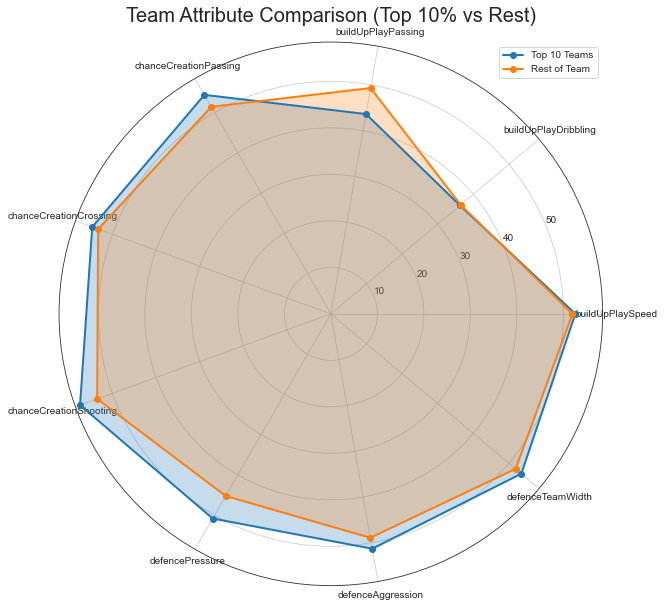

In [48]:
#Plot radar graph to compare the Team Attributes

from math import pi

Top10TeamsVal=list(Top10Teams_df[14:].values)
Top10TeamsVal.append(Top10TeamsVal[0])
RestOfTeamsVal=list(RestOfTeams_df[14:].values)
RestOfTeamsVal.append(RestOfTeamsVal[0])
categories=Top10Teams_df.index[14:]
N=len(categories)

angles=[2*pi*i/N for i in range(N)]
angles.append(angles[0])

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,polar=True)

plt.title("Team Attribute Comparison (Top 10% vs Rest)",fontsize=20)

plt.xticks(angles[:-1],categories)


ax.plot(angles,Top10TeamsVal,'o-',linewidth=2,label='Top 10 Teams')
ax.fill(angles,Top10TeamsVal,alpha=0.25)

ax.plot(angles,RestOfTeamsVal,'o-',linewidth=2,label='Rest of Team')
ax.fill(angles,RestOfTeamsVal,alpha=0.25)

ax.legend()

plt.show()

**Observations:** <br>
From the above radar graph we notice defencePressure, buildUpPlayPassing, ChanceCreationShooting to be the top determining factors, in determining a team's effectiveness followed by chanceCreationPassing, chanceCreationShooting, defenceAggression.<br><br>
**1.) From Defence point of view:**<br>
    Effective Teams have High defencePressure & High Aggression when compared to Rest of the Teams.<br>
    High defencePressure & High defence Aggression i,e having a high defensive line and the defenders being aggressive in terms of making the tackles,     will put pressure on the opposite team (team in possession of the ball), with the idea of getting the ball or forcing them to commit a mistake.<br><br>
**2.) buildUpPlay point of view:**<br>
    Effective Teams have Low buildUpPlayPassing when compared to Rest of the Teams. <br>
    Low buildUpPlayPassing i,e having your closest players run  towards the ball once you are in possession of it, thus offering a safe option. High buildUpPlayPassing just indicates that the players would spread out across the pitch and far away from the ball. This may help spread the ball more accros the pitch but also increases the chances of losing the ball.<br><br>
**3.) chanceCreation point of view:**<br>
   Effective Teams have High chanceCreationPassing when compared to Rest of the Teams. 
   High chanceCreationPassing i,e Players will better position themselves to receive the pass in final third. This means the priority here would not be to get  a safe pass but rather to get behind the defense and onto the goal even if it meant being marked by the opposite players. Low chanceCreationPassing indicates the priority is to receive a safe pass (receive pass in open space) even if it means moving away from the goals.<br>
   High chanceCreationShooting i,e Players will run around to create an opportunity to shoot from anywhere in the final third.<br>
   Low chanceCreationShooting  indicates that Players dont tun around to create the opportunity rather they get into position that might result into goal, even if it meant not  touching the ball.